In [1]:
import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Model data 
### COSP 

- A number of the COSP files need to be divided the daylit areas mask
- COSP data comes out as grid box mean: eg. in cloud water path x cloud fraction. 

In [2]:
fname = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/bx400a.pdc2*'
data = xr.open_mfdataset(fname,parallel=True)

LWP_A = xr.DataArray((data['field2466']/data['field2330'])*1000,name='LWP') # convert from kg/m2 to g/m2
IWP_A = xr.DataArray((data['field2467']/data['field2330'])*1000,name='IWP') # convert from kg/m2 to g/m2
CFL_A = xr.DataArray(data['field2452']/data['field2330'],name='CFL') 
CFI_A = xr.DataArray(data['field2453']/data['field2330'],name='CFI')

In [3]:
LWP_A22 = xr.DataArray((data['field2466']/data['field2452']/data['field2330'])*1000,name='LWP') # convert from kg/m2 to g/m2
IWP_A22 = xr.DataArray((data['field2467']/data['field2453']/data['field2330'])*1000,name='IWP') # convert from kg/m2 to g/m2


### Raw model 

- Raw model comes out as grid box mean. 

In [4]:
fname = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/bx400a.pd.glob20*'
data_met = xr.open_mfdataset(fname,parallel=True)
# note I have used the raw model LWP/IWP not the COSP versions due to unrealistically large biases. 
LWP_A2 = xr.DataArray(data_met.lwp,name='LWP')*1000 # convert from kg/m2 to g/m2
IWP_A2 = xr.DataArray(data_met.clivi,name='IWP')*1000 # convert from kg/m2 to g/m2

In [5]:
CFL_AA = data_met.field267.max('z1_hybrid_height').load()
CFI_AA = data_met.field268.max('z1_hybrid_height').load()

In [6]:
LWP_A222 = xr.DataArray((data_met.lwp/CFL_AA),name='LWP')*1000 # convert from kg/m2 to g/m2
IWP_A222 = xr.DataArray((data_met.clivi/CFI_AA),name='IWP')*1000 # convert from kg/m2 to g/m2

# MODIS

- MODIS give the in cloud water paths: need to multiply by cloud fraction to get the grid box mean 

In [7]:
fdir = '/g/data/p66/slf563/OBS/MCD06COSP_D3_MODIS/MCD06COSP_D3_MODIS.201*cloud.nc'
MODIS = xr.open_mfdataset(fdir)

In [8]:
MODIS = MODIS[['CTP','LWP','IWP','CFI','CFL','TauL','TauI']]
MODIS['LWP'] = MODIS['LWP']*MODIS['CFL'] # Multiply by the cloud fraction to match the access data
MODIS['IWP'] = MODIS['IWP']*MODIS['CFI'] # Multiply by the cloud fraction to match the access data

# Plot

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


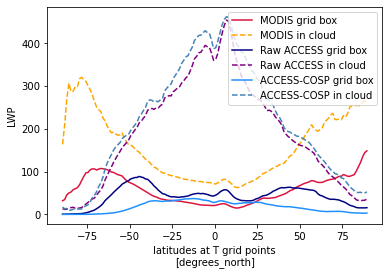

In [9]:
MODIS['LWP'].mean(dim=('time','lon')).plot(color='crimson',label='MODIS grid box')
(MODIS['LWP']/MODIS['CFL']).mean(dim=('time','lon')).plot(color='orange',label='MODIS in cloud',linestyle='--')
LWP_A2.mean(dim=('time','lon')).plot(color='navy',label='Raw ACCESS grid box')
LWP_A222.mean(dim=('time','lon')).plot(color='purple',label='Raw ACCESS in cloud',linestyle='--')
LWP_A.mean(dim=('time','lon')).plot(color='dodgerblue',label='ACCESS-COSP grid box')
LWP_A22.mean(dim=('time','lon')).plot(color='steelblue',label='ACCESS-COSP in cloud',linestyle='--')
plt.legend();

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


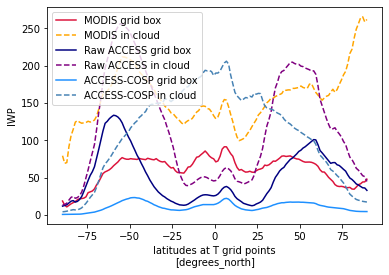

In [10]:
MODIS['IWP'].mean(dim=('time','lon')).plot(color='crimson',label='MODIS grid box')
(MODIS['IWP']/MODIS['CFI']).mean(dim=('time','lon')).plot(color='orange',label='MODIS in cloud',linestyle='--')
IWP_A2.mean(dim=('time','lon')).plot(color='navy',label='Raw ACCESS grid box')
(IWP_A2.mean(dim=('time','lon'))/(CFI_AA.mean(dim=('time','lon')))).plot(color='purple',label='Raw ACCESS in cloud',linestyle='--')
IWP_A.mean(dim=('time','lon')).plot(color='dodgerblue',label='ACCESS-COSP grid box')
IWP_A22.mean(dim=('time','lon')).plot(color='steelblue',label='ACCESS-COSP in cloud',linestyle='--')
plt.legend();

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


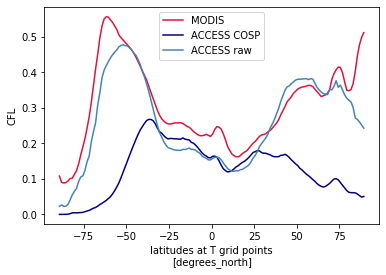

In [11]:
MODIS['CFL'].mean(dim=('time','lon')).plot(color='crimson',label='MODIS')
CFL_A.mean(dim=('time','lon')).plot(color='navy',label='ACCESS COSP')
CFL_AA.mean(dim=('time','lon')).plot(color='steelblue',label='ACCESS raw')
plt.ylabel('CFL')
plt.legend();

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


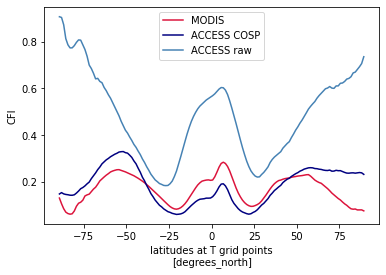

In [12]:
MODIS['CFI'].mean(dim=('time','lon')).plot(color='crimson',label='MODIS')
CFI_A.mean(dim=('time','lon')).plot(color='navy',label='ACCESS COSP')
CFI_AA.mean(dim=('time','lon')).plot(color='steelblue',label='ACCESS raw')
plt.ylabel('CFI')
plt.legend();